<a href="https://colab.research.google.com/github/sightes/COFFETALKS/blob/main/Clase_19_Coderhouse_DS_Caso_Estudio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Caso de Estudio  04**

*   Se entrega el siguiente set de datos del área de Recursos Humanos de una 
empresa del sector de consultoría HRAnalytics.csv. El análisis de los recursos humanos o los colaboradores está revolucionando la forma en que operan los departamentos de recursos humanos, lo que lleva a una mayor eficiencia y mejores resultados en general. Recursos humanos ha estado utilizando la analítica durante años. Sin embargo, la recopilación, el procesamiento y el análisis de datos han sido en gran medida manuales y, dada la naturaleza de la dinámica de los recursos humanos y los KPI de RR.HH., el enfoque ha estado restringiendo a los RR.HH.


*   Por lo tanto, es sorprendente que los departamentos de recursos humanos se hayan dado cuenta de la utilidad del aprendizaje automático tan tarde en el juego. En el último año por ejemplo la rotación en el área de Analytics de la empresa ha estado por encima del 20% anual, lo que de una u otra manera dificulta la continuidad de los procesos y proyectos además de la transferencia de conocimientos.   Uno de los motivos por los cuáles los ex – colaboradores manifiestan que han decidido buscar nuevas oportunidades es por la falta de línea de carrera en la empresa mencionada.


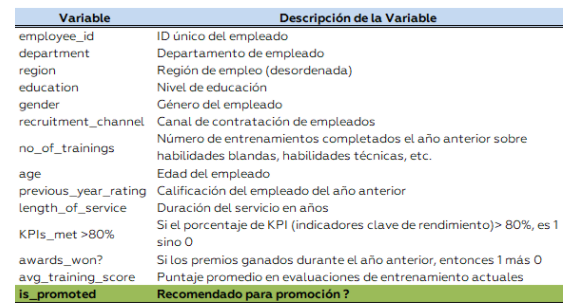


#https://www.kaggle.com/shivan118/hranalysis

In [ ]:
!wget "https://drive.google.com/u/2/uc?id=1jJmet47e7jH9ilo8L48XkDp7MiJqvB-M&export=download" -O HRAnalytics.csv


--2022-01-18 03:04:44--  https://drive.google.com/u/2/uc?id=1jJmet47e7jH9ilo8L48XkDp7MiJqvB-M&export=download
Resolving drive.google.com (drive.google.com)... 74.125.129.101, 74.125.129.100, 74.125.129.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.129.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-30-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/beiu6udc6n5ucknn95ph12mphv247r9g/1642475025000/18340134811011616317/*/1jJmet47e7jH9ilo8L48XkDp7MiJqvB-M?e=download [following]
--2022-01-18 03:04:44--  https://doc-0o-30-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/beiu6udc6n5ucknn95ph12mphv247r9g/1642475025000/18340134811011616317/*/1jJmet47e7jH9ilo8L48XkDp7MiJqvB-M?e=download
Resolving doc-0o-30-docs.googleusercontent.com (doc-0o-30-docs.googleusercontent.com)... 209.85.147.132, 2607:f8b0:4001:c20::84
Connecting to doc-0o-30-docs.googleusercontent.com (do

In [2]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  confusion_matrix, roc_auc_score,  precision_score, recall_score
from sklearn.model_selection import cross_val_score
warnings.filterwarnings("ignore")
df=pd.read_csv('HRAnalytics.csv',sep=',')
# filling missing values in train data
df["education"].fillna(df["education"].mode()[0],inplace=True)
df["previous_year_rating"].fillna(1,inplace=True)
# removing the employee_id column because it's useless in our data
df=df.drop(["employee_id"],axis=1)
df = pd.get_dummies(df)
x=df.drop("is_promoted",axis=1)
y=df["is_promoted"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [3]:

def apply_model(model1):
    model = model1
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = cross_val_score(model, x_train, y_train, cv = 6)
    precision = precision_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print ('Train score of '+str(model1)[:-2]+' is', score.mean(),'%')
    print ('Precision score is ', precision)
    #print ('ROC Score is', roc)
    #print ('Recall Score is ', recall)
    print ('Confusion Matrix\n\n', cm)

print('Resultado Regresion logistica')
apply_model(LogisticRegression())
print('--')
print('Resultado Random Forest')
apply_model(RandomForestClassifier())

Resultado Regresion logistica
Train score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=Fals is 0.9203803741988666 %
Precision score is  0.6507177033492823
Confusion Matrix

 [[9981   73]
 [ 772  136]]
--
Resultado Random Forest
Train score of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, rand